<a href="https://colab.research.google.com/github/Russia31/dap-2024/blob/main/les06/lec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №6. Линейная регрессия

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les06
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Набор данных Diabetes (Диабет) содержит 442 образца с 10-ю признаками: возраст, пол, индекс массы тела, средний показатель давления крови и шесть измерений сыворотки крови. Целевое значение - количественный показатель прогрессирования заболевания через год после анализов.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Извлечение данных

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

1. Выведете описание набора данных и наименование признаков.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()

data = diabetes.data
target = diabetes.target
features = diabetes.feature_names

print("Форма набора данных:", data.shape)
print("Наименование признаков:\n", features)

Форма набора данных: (442, 10)

Наименование признаков:

 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### Подготовка данных

2. Из загруженного набора данных создайте DataFrame, содержащий как признаки, так и целевое значение. Выведите первые 5 строк набора.

In [ ]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print(df.head())


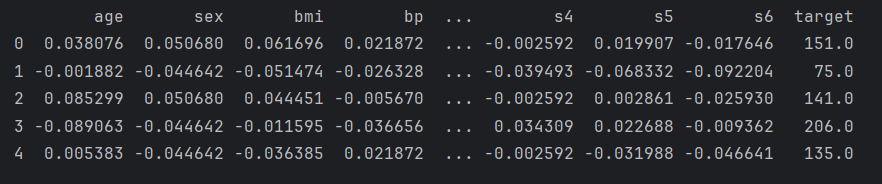

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе категориальные признаки? Имеются ли в наборе данные имеющие значение null?

In [ ]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print("Информация о типах данных:")
print(df.info())

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nКатегориальные признаки:", categorical_features)

null_values = df.isnull().sum()
print("\nКоличество значений null в каждом столбце:")
print(null_values[null_values > 0])

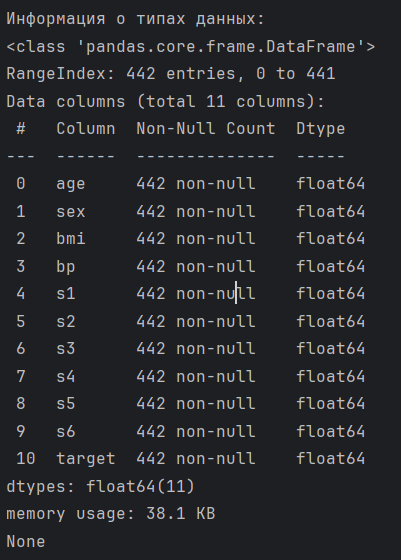

## Исследование данных

4. Постройте матрицу корреляции.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

diabetes = datasets.load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Матрица корреляции')
plt.show()

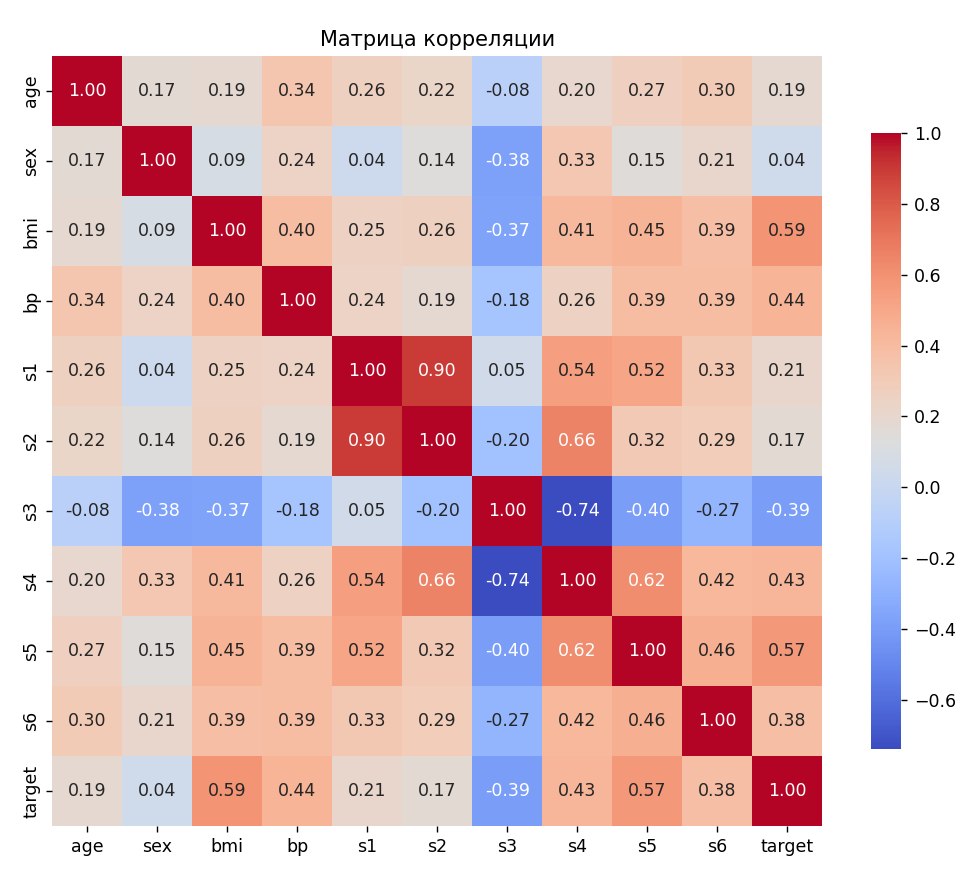

5. Постройте диаграмму рассеяния целевого значение и признака, коэффициент корреляции которого с  целевым значением, самый высокий.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

diabetes = datasets.load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

correlation_matrix = df.corr()

#наивысш. кор
correlation_with_target = correlation_matrix['target'].drop('target')
highest_correlation_feature = correlation_with_target.idxmax()
highest_correlation_value = correlation_with_target.max()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=highest_correlation_feature, y='target')
plt.title('Диаграмма рассеяния:')
plt.xlabel(highest_correlation_feature)
plt.ylabel('Целевое значение')
plt.grid()

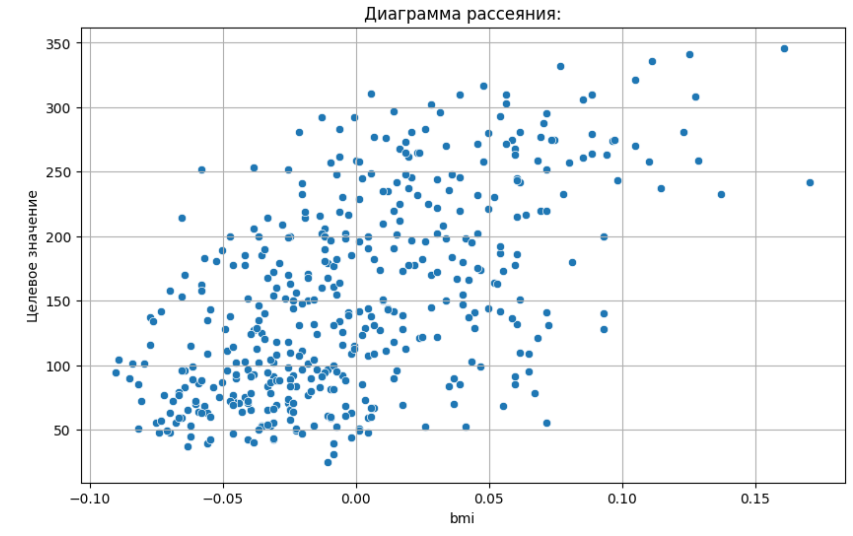

6. Сформируйте набор признаков (X) из 5 признаков с самым высоким коэффициентом корреляции с целевым значением. Сформируйте набор для целевого значения (y).

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

diabetes = datasets.load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

correlation_matrix = df.corr()

# 5 признаков с наив. кор. с целевым зна-ем
correlation_with_target = correlation_matrix['target'].drop('target')
top_5_features = correlation_with_target.nlargest(5).index.tolist()

#  набор признаков (X) целевое значение (y)
X = df[top_5_features]
y = df['target']

print("Топ-5 признаков с наивысшей корреляцией с целевым значением:")
print(top_5_features)
print("\nФорма набора признаков (X):", X.shape)
print("Форма целевого значения (y):", y.shape)

Топ-5 признаков с наивысшей корреляцией с целевым значением:

['bmi', 's5', 'bp', 's4', 's6']


Форма набора признаков (X): (442, 5)

Форма целевого значения (y): (442,)

## Предсказательная модель

7. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

correlation_matrix = df.corr()

# 5 признаков с наив. кор. с целевым зна-ем
correlation_with_target = correlation_matrix['target'].drop('target')
top_5_features = correlation_with_target.nlargest(5).index.tolist()

#  набор признаков (X) целевое значение (y)
X = df[top_5_features]
y = df['target']

# делим данные на обучающую и тестовую выборки 75% для обучения, 25% для тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Форма обучающей выборки (X_train):", X_train.shape)
print("Форма тестовой выборки (X_test):", X_test.shape)
print("Форма целевого значения обучающей выборки (y_train):", y_train.shape)
print("Форма целевого значения тестовой выборки (y_test):", y_test.shape)

Форма обучающей выборки (X_train): (331, 5)

Форма тестовой выборки (X_test): (111, 5)

Форма целевого значения обучающей выборки (y_train): (331,)

Форма целевого значения тестовой выборки (y_test): (111,)

8. Выполните обучение модели.

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

diabetes = datasets.load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

correlation_matrix = df.corr()

correlation_with_target = correlation_matrix['target'].drop('target')
top_5_features = correlation_with_target.nlargest(5).index.tolist()

X = df[top_5_features]
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Коэффициент детерминации (R²):", r2)

coefficients = pd.DataFrame(model.coef_, index=top_5_features, columns=['Коэффициент'])
print(coefficients)

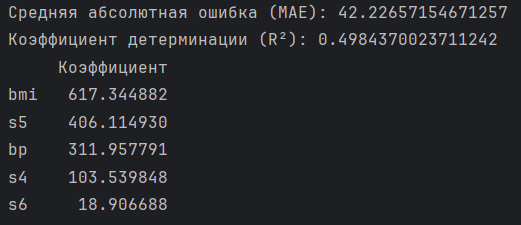

## Проверка модели

9. Расчитайте Root mean squared error (RMSE)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

diabetes = datasets.load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

#  обучающая и тестовая выборки
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# обучение модели линейной регр.
model = LinearRegression()
model.fit(X_train, y_train)

# предсказания на тестовой выборке
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Корень среднеквадратичной ошибки (RMSE): {rmse}')

Корень среднеквадратичной ошибки (RMSE): 53.85344583676593

10. Расчитайте R² (коэффициент детерминации)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

diabetes = datasets.load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

#  обучающая и тестовая выборки
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# обучение модели линейной регр.
model = LinearRegression()
model.fit(X_train, y_train)

# предсказания на тестовой выборке
y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'Коэффициент детерминации (R²): {r_squared}')


Коэффициент детерминации (R²): 0.4526027629719195

## Вопросы для защиты

1. Какие типы машинного обучения вы знаете?
2. Чем отличается обучение с учителем и без учителя?
3. Чем пакетное обучение отличается от динамического?
4. Чем обучение на основе образцов отличается от обучения на основе модели?
5. Что такое линейная регрессия?
6. Что такое градиентный спуск?
7. Как правильно обрабатывать категориальные признаки?
8. Что такое матрица корреляции?
9. Что показывает метрика RMSE?
10. Что показывает метрика R²?